Q3: Is there a correlation based on symptoms vs preexisting conditions?

In [1]:
# dependencies 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from sklearn import tree
%matplotlib inline
import seaborn as sns

# database 
import psycopg2
import config as creds

In [2]:
conn_string = "host="+ creds.PGHOST +" port="+ "5432" +" dbname="+ creds.PGDATABASE +" user=" + creds.PGUSER \
                  +" password="+ creds.PGPASSWORD
    
conn = psycopg2.connect(conn_string)

In [3]:
covid_df = pd.read_sql_query(
                   ''' SELECT * FROM coviddata 
                   ''' , conn)
covid_df = covid_df.iloc[1:]

In [6]:
covid_df;

In [7]:
column_names = ['hypertension', 'diabetes', 'cardiovasculardisease',
                'lungdisease', 'cancer', 'chronickidneydisease', 'fever', 'tachypnea',
                'cough', 'shortofbreath',  'diarrhea',
                'fatigue']
factors = covid_df[column_names]
factors;

In [8]:
factors=factors.astype(str).astype(float)

In [9]:
factors.corr()

,hypertension,diabetes,cardiovasculardisease,lungdisease,cancer,chronickidneydisease,fever,tachypnea,cough,shortofbreath,diarrhea,fatigue
hypertension,1.000000,0.293388,0.273774,0.201661,0.267184,0.164724,0.093750,-0.026175,0.067040,0.323263,-0.046802,0.230167
diabetes,0.293388,1.000000,0.305186,0.560300,0.138164,0.363383,-0.071648,0.080528,-0.033767,0.242567,-0.136130,0.079022
cardiovasculardisease,0.273774,0.305186,1.000000,0.392851,0.069660,0.274974,0.017694,0.146493,-0.148418,0.100967,-0.023153,-0.096567
lungdisease,0.201661,0.560300,0.392851,1.000000,0.098774,0.535319,-0.163521,-0.019136,-0.108156,0.300069,-0.134789,0.007097
cancer,0.267184,0.138164,0.069660,0.098774,1.000000,0.036400,0.075728,-0.048253,0.058609,0.172405,-0.016334,0.138304
chronickidneydisease,0.164724,0.363383,0.274974,0.535319,0.036400,1.000000,0.017160,0.008746,0.027325,0.242109,-0.090868,-0.063672
fever,0.093750,-0.071648,0.017694,-0.163521,0.075728,0.017160,1.000000,0.023800,0.427877,0.057821,0.163087,0.355991
tachypnea,-0.026175,0.080528,0.146493,-0.019136,-0.048253,0.008746,0.023800,1.000000,-0.013228,0.021111,0.050779,-0.034498
cough,0.067040,-0.033767,-0.148418,-0.108156,0.058609,0.027325,0.427877,-0.013228,1.000000,0.259037,0.385735,0.355461
shortofbreath,0.323263,0.242567,0.100967,0.300069,0.172405,0.242109,0.057821,0.021111,0.259037,1.000000,0.033276,0.035443


In [10]:
corr = factors.corr()

<AxesSubplot:>

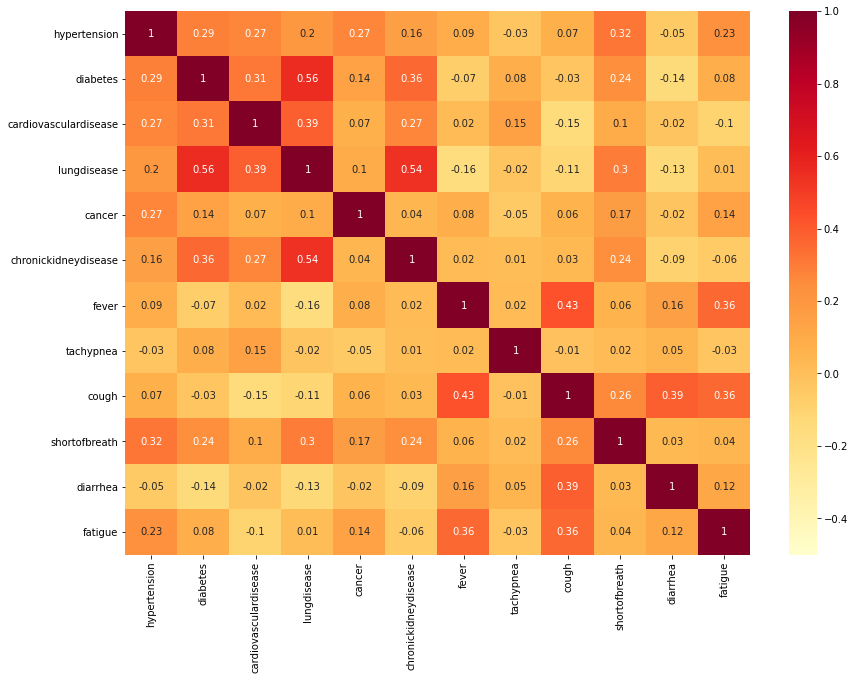

In [11]:
fig, ax = plt.subplots(figsize=(14,10)) 

corr=corr.round(2)
sns.heatmap(corr, annot=True, vmin=-0.5, cmap="YlOrRd")


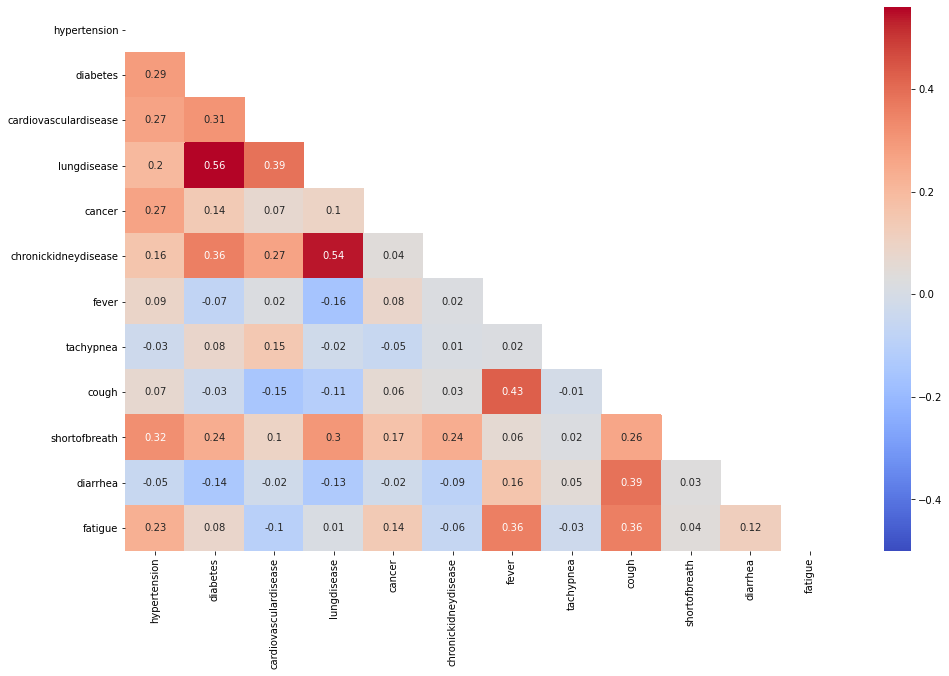

In [15]:
plt.figure(figsize=(16, 10))
mask = np.triu(np.ones_like(factors.corr(), dtype=np.bool))
heatmap = sns.heatmap(corr, mask=mask, annot=True, vmin=-0.5, cmap="coolwarm")
plt.savefig('../static/images/correlationmatrix1.png')